<a href="https://colab.research.google.com/github/prajjwal23/codsoft_task1_titanic_prediction/blob/main/codsoft_task1_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
titanic= pd.read_csv("tested.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
titanic.shape

(418, 12)

# Missing Data and Duplication

In [ ]:
print(round((titanic.isna().sum()/len(titanic.index))*100, 2))

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Cabin          78.23
Embarked        0.00
dtype: float64


In [ ]:
titanic.drop(['Cabin'], axis=1, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
age= titanic['Age'].mean()
fare= titanic['Fare'].mean()
titanic = titanic.fillna({'Age' : age , 'Fare' : fare})
titanic['Age'] = titanic['Age'].astype(int)

In [ ]:
 #titnic = titanic['Age'].astype('int64',axis=1)
titanic=titanic.astype({'Age':'int64','Fare':'int64'})

In [ ]:
titanic.duplicated().sum()

0

# Outliers

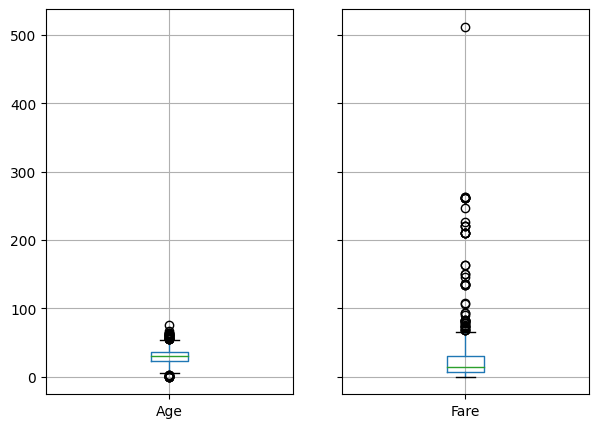

In [ ]:

fig, ( ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7,5))
titanic.boxplot('Age', ax=ax1)
titanic.boxplot('Fare', ax=ax2)
plt.show()


In [ ]:
#from above outliers exist in last two numeric columns : {Age, Fare}
def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    lowerBound = Q1 - 1.5 * IQR
    upperBound = Q3 + 1.5 * IQR
    lst = df.index[(df[ft] < lowerBound)|(df[ft] > upperBound)]
    return lst

In [ ]:

lst=[]
for ft1 in ['Age']:
    lst.extend(outliers(titanic,ft1))
for ft2 in ['Fare']:
    lst.extend(outliers(titanic,ft2))
titanic = titanic.drop(lst)


# Visualization of survivals

*Survivals according to Age nd Gender*

In [ ]:
titanic[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=0)

,Sex,Survived
0,female,1.0
1,male,0.0


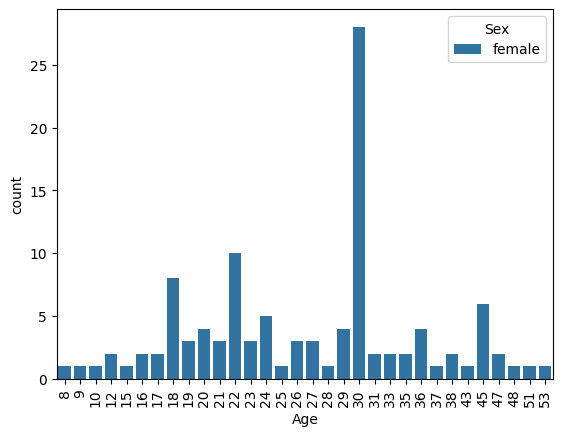

In [ ]:
survivals = titanic.loc[titanic.Survived == 1]
sns.countplot(data = survivals, x = 'Age', hue = 'Sex')
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(18,8.27)})
plt.show()

*according to class*

Text(0.5, 1.0, 'survivals according to their class')

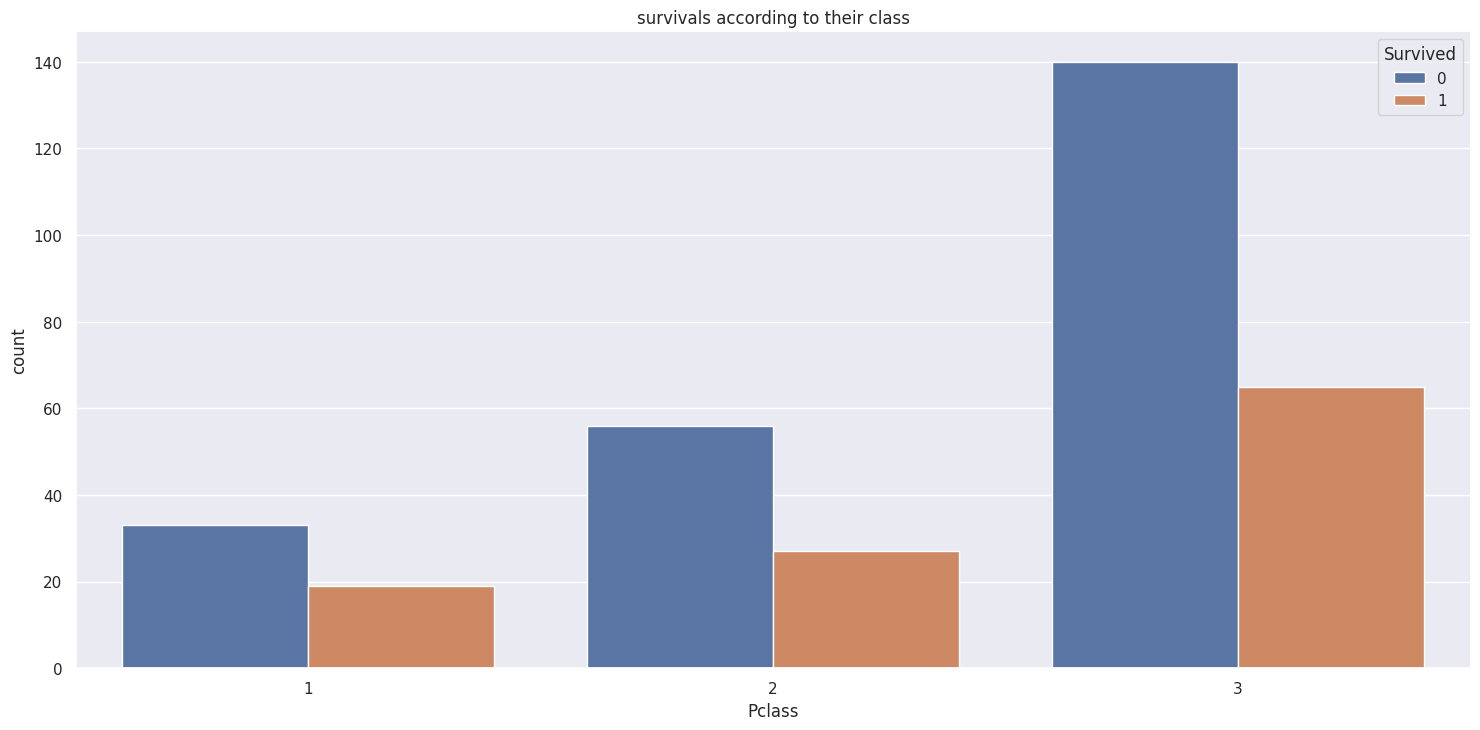

In [ ]:
sns.countplot(data = titanic, x = 'Pclass', hue = 'Survived')
sns.set(rc={'figure.figsize':(7,7)})
plt.title('survivals according to their class')

*accroding to fare and the class*

In [ ]:
titanic.groupby('Pclass')[['Survived','Fare']].sum()

,Survived,Fare
Pclass,,
1,19,2004
2,27,1719
3,65,2197


In [ ]:
titanic.groupby('Sex', as_index=False)[['Survived']].mean()

,Sex,Survived
0,female,1.0
1,male,0.0


In [ ]:
t1=titanic.groupby(['Pclass','Sex'], as_index=False)[['Survived']].sum()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  func(*plot_args, **plot_kwargs)


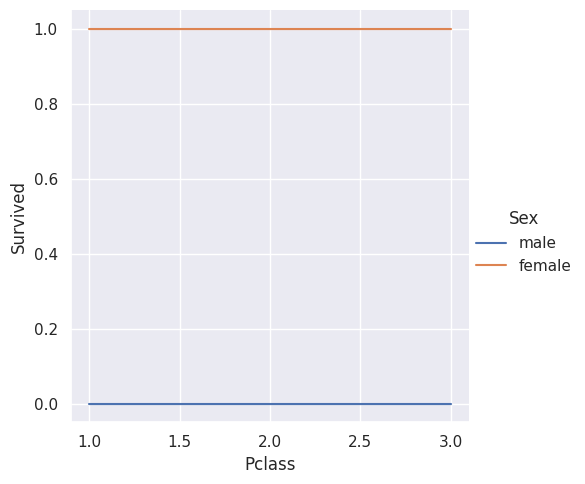

In [ ]:
sns.relplot(data=titanic, x='Pclass', y='Survived', hue='Sex', kind='line'
            , ci=False )
#a plot shows the diversity in survived number of people according to their class in both males and females

In [ ]:
titanic.groupby('Survived', as_index=False)['SibSp'].sum()

,Survived,SibSp
0,0,71
1,1,49


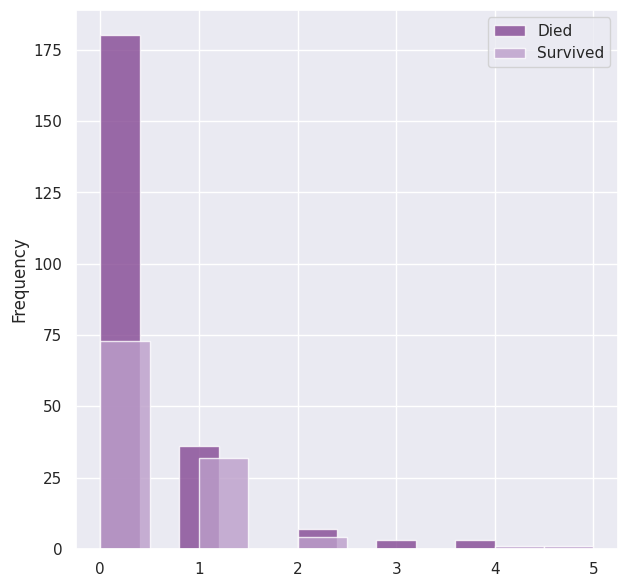

In [ ]:
sns.set_palette("PRGn")
titanic.groupby('Survived', as_index=False)['SibSp'].plot.hist(histtype= 'bar',alpha = 0.8)
sns.set(rc={'figure.figsize':(7,8.27)})
plt.legend(('Died','Survived'),)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


Text(0.5, 1.0, 'how Families located in different calss could make it')

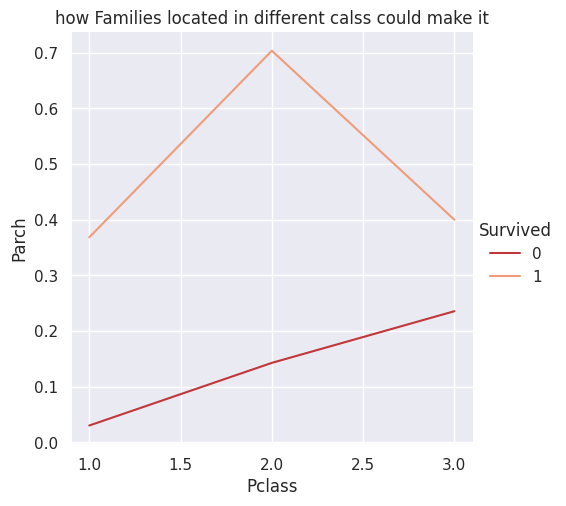

In [ ]:
sns.set_palette("RdBu")
sns.relplot(x="Pclass",
            y="Parch",
            data=titanic,
            kind="line",
            hue= 'Survived',
            ci=None
            )
plt.title('how Families located in different calss could make it')

In [ ]:
titanic.drop(columns=['Name','Ticket','PassengerId'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34,0,0,7,Q
1,1,3,female,47,1,0,7,S
3,0,3,male,27,0,0,8,S
4,1,3,female,22,1,1,12,S
5,0,3,male,14,0,0,9,S


categorical to numerical conversion

In [ ]:
titanic.describe(include=['O'])

,Sex,Embarked
count,340,340
unique,2,3
top,male,S
freq,229,229


In [ ]:
titanic['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [ ]:
titanic.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'Q':1,'C':2}}, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7,1
1,1,3,1,47,1,0,7,0
3,0,3,0,27,0,0,8,0
4,1,3,1,22,1,1,12,0
5,0,3,0,14,0,0,9,0


In [ ]:
X = titanic.drop(columns=['Survived'], axis=1)
Y = titanic['Survived']

# ML Model

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
print(round((Xtrain.shape[0]/len(X.index))*100 ,2))
print(Xtrain.shape, Xtest.shape)

80.0
(272, 7) (68, 7)


In [ ]:
model = LogisticRegression()
model.fit(Xtrain, Ytrain)
Ytrain_pred = model.predict(Xtrain)
training_accuracy = accuracy_score(Ytrain_pred, Ytrain)
print("train accuracy:",round(training_accuracy, 2))
Ytest_pred = model.predict(Xtest)
test_accuracy = accuracy_score(Ytest_pred, Ytest)
print("test accuracy:",round(test_accuracy, 2))

train accuracy: 1.0
test accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# prediction

In [ ]:
print(model.predict([[3, 1, 26, 0, 0, 7 ,0]]))
print(model.predict([[3, 0, 35, 0, 0, 8, 0]]))

[1]
[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
